In [1]:
#install.packages("ggplot2")
library(ggplot2)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
#Reading dataset
salary = read.csv('/content/ds_salaries.csv', header=T, na.strings='' )
head(salary )

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


Explanation from each columns

**work_year** : The year the salary was paid

**experience_level** : The experience level in the job during the year

**employment_type** : The type of employment

**job_title** : The role worked in during the year

**salary** : The total gross salary amount paid

**salary_currency** : The currency of the salary paid as an ISO 4217 currency code

**salary_in_usd** : The salary in USD

**employee_residence** : Employee’s primary country of residence in during the work year as an ISO 3166 country code

**remote_ratio** : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%), 50 Partially remote, and 100 Fully remote (more than 80%)

**company_location** : The country of the employer’s main office or contracting branch as an ISO 3166 country code

**company_size** : The average number of people that worked for the company during the year: S less than 50 employees (small), M 50 to 250 employees (medium) , and L more than 250 employees (large)

In [7]:
# checking the structure of dataset
str(salary)

'data.frame':	607 obs. of  12 variables:
 $ X                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr  "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : int  70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr  "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : int  79833 260000 109024 20000 150000 72000 190000 35735 135000 125000 ...
 $ employee_residence: chr  "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : int  0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr  "DE" "JP" "GB" "HN" ...
 $ company_size      : chr  "L" "S" "M" "S" ...


From the data, I found some columns that does not have datatype exactly.

The datatype of these columns have to change to factor

In [8]:
salary$experience_level <- as.factor(salary$experience_level)
salary$employment_type <- as.factor(salary$employment_type)
salary$job_title <- as.factor(salary$job_title)
salary$salary_currency <- as.factor(salary$salary_currency)
salary$employee_residence <- as.factor(salary$employee_residence)
salary$company_location <- as.factor(salary$company_location)
salary$company_size <- as.factor(salary$company_size)

The datatype of these columns have to change to numeric

work_year,
salary,
salary_in_usd,
remote_ratio

In [9]:
salary$work_year <- as.numeric(salary$work_year)
salary$salary <- as.numeric(salary$salary)
salary$salary_in_usd <- as.numeric(salary$salary_in_usd)
salary$remote_ratio <- as.numeric(salary$remote_ratio)

In [10]:
str(salary)

'data.frame':	607 obs. of  12 variables:
 $ X                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : Factor w/ 4 levels "EN","EX","MI",..: 3 4 4 3 4 1 4 3 3 4 ...
 $ employment_type   : Factor w/ 4 levels "CT","FL","FT",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ job_title         : Factor w/ 50 levels "3D Computer Vision Researcher",..: 23 41 8 48 38 13 35 23 9 34 ...
 $ salary            : num  70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : Factor w/ 17 levels "AUD","BRL","CAD",..: 8 17 9 17 17 17 17 10 17 17 ...
 $ salary_in_usd     : num  79833 260000 109024 20000 150000 ...
 $ employee_residence: Factor w/ 57 levels "AE","AR","AT",..: 15 33 21 24 56 56 56 26 56 42 ...
 $ remote_ratio      : num  0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : Factor w/ 50 levels "AE","AS","AT",..: 13 30 19 21 49 49 49 23 49 39 ...
 $ company_size      : Facto

In [11]:
class(salary)

[1] "data.frame"

In [12]:
# Checking the statistical summary of dataset
summary(salary)

       X           work_year    experience_level employment_type
 Min.   :  0.0   Min.   :2020   EN: 88           CT:  5         
 1st Qu.:151.5   1st Qu.:2021   EX: 26           FL:  4         
 Median :303.0   Median :2022   MI:213           FT:588         
 Mean   :303.0   Mean   :2021   SE:280           PT: 10         
 3rd Qu.:454.5   3rd Qu.:2022                                   
 Max.   :606.0   Max.   :2022                                   
                                                                
                     job_title       salary         salary_currency
 Data Scientist           :143   Min.   :    4000   USD    :398    
 Data Engineer            :132   1st Qu.:   70000   EUR    : 95    
 Data Analyst             : 97   Median :  115000   GBP    : 44    
 Machine Learning Engineer: 41   Mean   :  324000   INR    : 27    
 Research Scientist       : 16   3rd Qu.:  165000   CAD    : 18    
 Data Science Manager     : 12   Max.   :30400000   JPY    :  3    
 (Ot

From this summary, I can know that this data start from 2020 until 2022 (work year). There are 4 experience levels, EN for Entry Level, MI for Mid-level, SE for Senior-level, and EX for Executive-level. There are also 4 employment types, CT for Contract, FL for Freelance, FT for Full Time, and PT for Part Time. This summary also shows the lowest and the highest salary that has been paid and other information from each column in data salary.

In [13]:
#checking null sum of null values in columns
colSums(is.na(salary))

X          work_year   experience_level    employment_type 
                 0                  0                  0                  0 
         job_title             salary    salary_currency      salary_in_usd 
                 0                  0                  0                  0 
employee_residence       remote_ratio   company_location       company_size 
                 0                  0                  0                  0

In [14]:

# checking null values if any
any(is.null(df))


[1] FALSE

In [15]:
#checking number of Rows and columns in dataset
nrow(salary)
ncol(salary)
dim(salary)

[1] 607

[1] 12

[1] 607  12

In [16]:
# Get the max salary from data frame.

sal <- max(salary$salary)
sal

[1] 30400000

In [17]:
#printing column names in dataframe
colnames(salary)

[1] "X"                  "work_year"          "experience_level"  
 [4] "employment_type"    "job_title"          "salary"            
 [7] "salary_currency"    "salary_in_usd"      "employee_residence"
[10] "remote_ratio"       "company_location"   "company_size"

In [18]:
# Installing ggplot2 & dplyr for visualization & EDA
#install.packages("ggplot2")
#install.packages("dplyr")
library(ggplot2)
library(dplyr)

**VISUALIZATION**

**LINE PLOT**

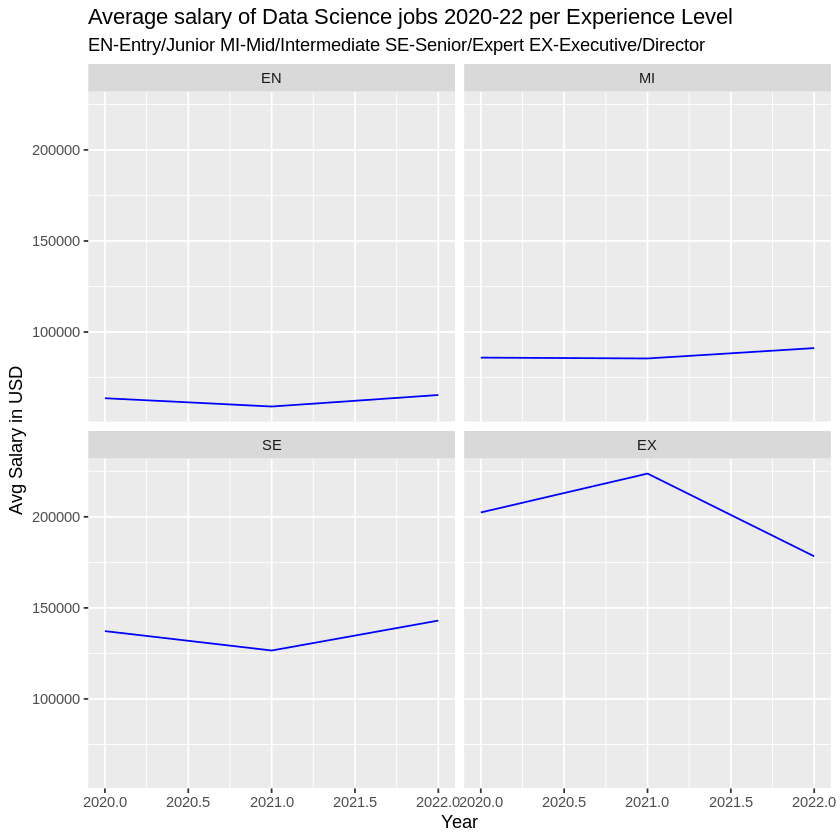

In [19]:
# Setting levels for experience_level in order to order the line charts
salary$experience_level_new = factor(salary$experience_level, levels=c('EN','MI','SE','EX'))
# Line chart to show how average salary(in USD) has changed over 2020-2022 for different experience levels
ggplot(data = salary) + 
geom_line(mapping = aes(x = work_year, y = salary_in_usd), color = "blue", stat = "summary", fun = "mean")+
labs(title="Average salary of Data Science jobs 2020-22 per Experience Level", x = "Year", y = "Avg Salary in USD", subtitle = "EN-Entry/Junior MI-Mid/Intermediate SE-Senior/Expert EX-Executive/Director")+
facet_wrap(~experience_level_new)

From the above set of line charts, we can observe how the average salaries have changed for different experience levels over the years 2020-22.

**SCATTER** **Plot**

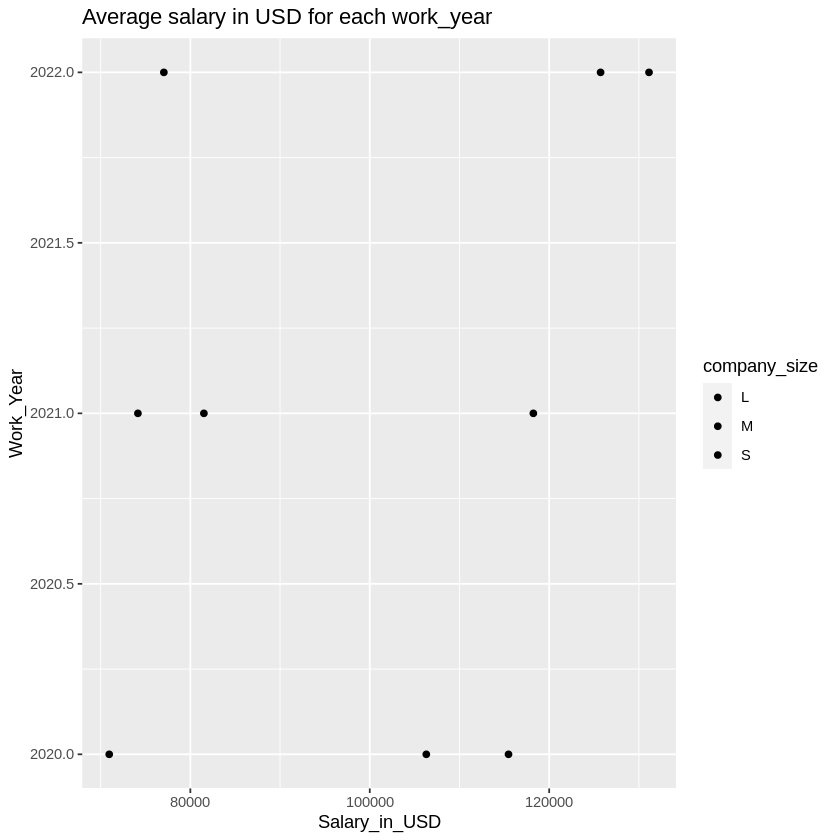

In [37]:
ggplot(salary,aes(y = salary_in_usd, x = work_year)) + geom_point(aes(y = salary_in_usd, x = work_year,fill = company_size),stat = "summary", fun = "mean") + coord_flip() +
labs(title="Average salary in USD for each work_year",y = "Salary_in_USD", x = "Work_Year",xlim=c(2,5),ylim=c(15,30)) 

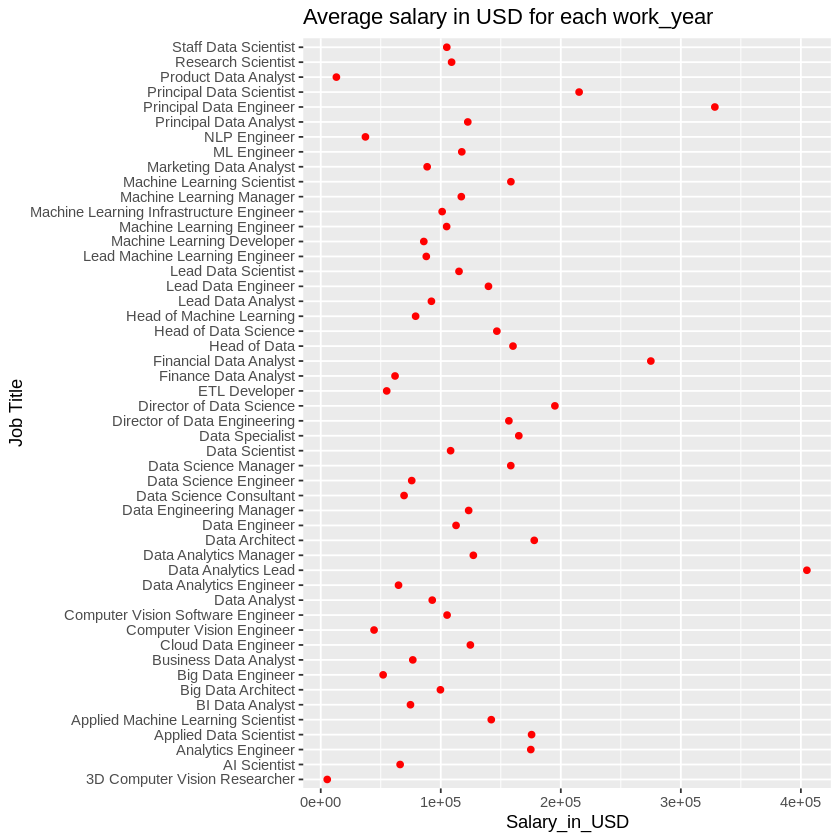

In [40]:
ggplot(salary,aes(y = salary_in_usd, x = job_title)) + geom_point(aes(y = salary_in_usd, x = job_title), color = "Red",stat = "summary", fun = "mean") + coord_flip() +
labs(title="Average salary in USD for each work_year",y = "Salary_in_USD", x = "Job Title",xlim=c(2,5),ylim=c(15,30)) 

This chart shows the breakdown of different data science job roles and the average salaries for each.

**BAR** **Graph**

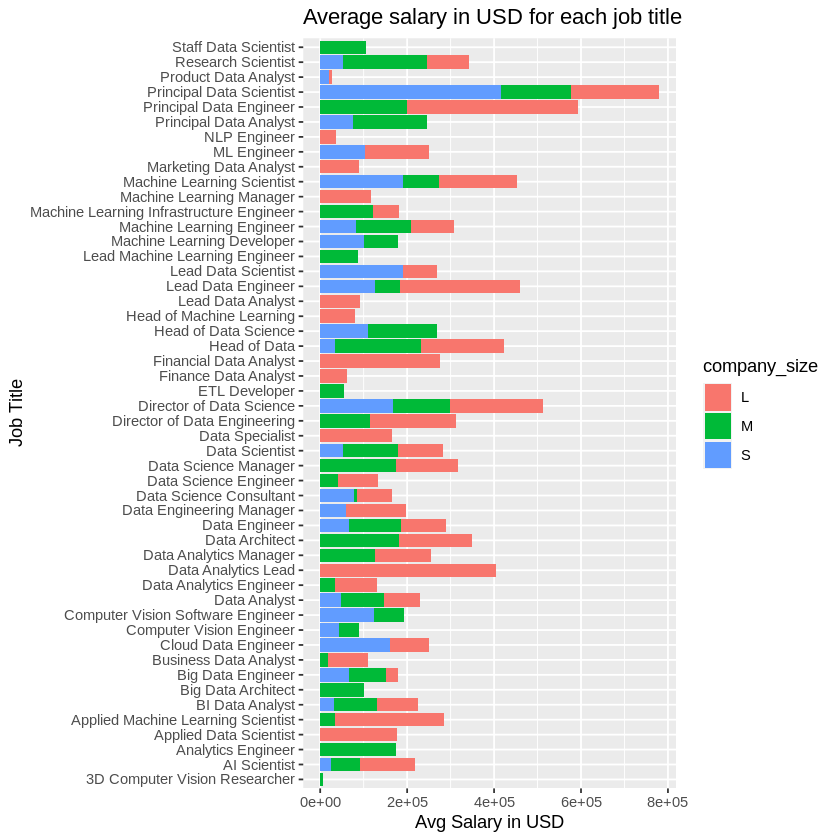

In [31]:
g <- ggplot(salary, aes(x=salary, y=job_title)) +geom_bar(aes(x = job_title, y = salary_in_usd, fill = company_size), stat = "summary", fun = "mean") +
    coord_flip() +
      labs(title="Average salary in USD for each job title", x = "Job Title", y = "Avg Salary in USD" ,xlim=c(2,5),
    ylim=c(20,30))
plot(g)

This chart shows the breakdown of different data science job roles and the average salaries for each. The fill shows how the salaries are distributed over small, medium and large companies.

**BAR** **Graph** 

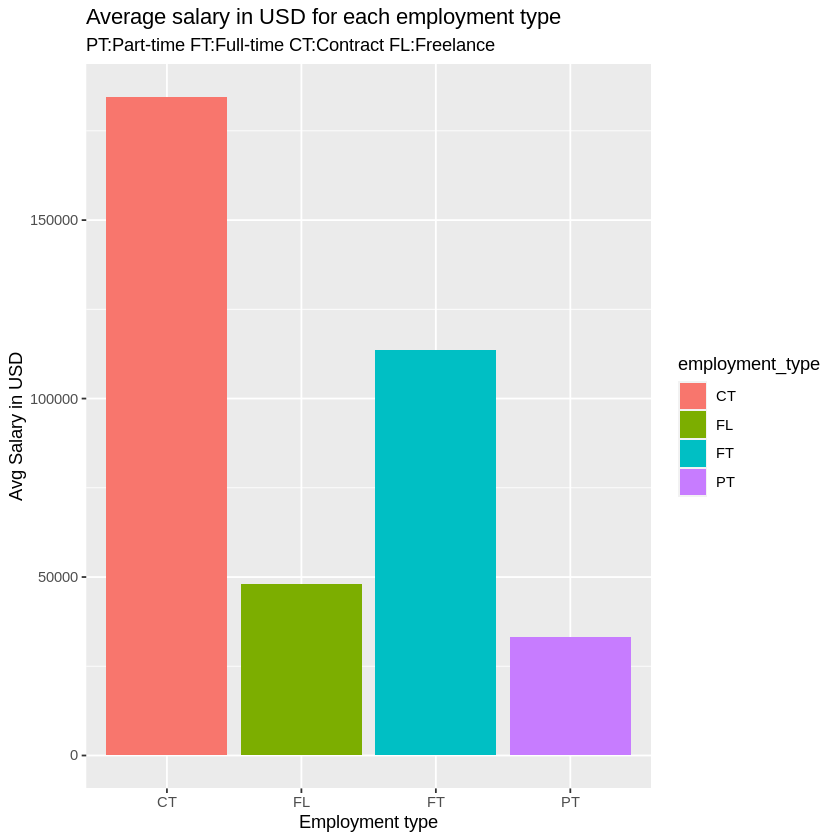

In [26]:
# Bar chart to represent average salary(in USD) for different employment types
ggplot(data=salary) + 
geom_bar(aes(x = employment_type, y = salary_in_usd, fill = employment_type), stat = "summary", fun = "mean") +
  labs(title="Average salary in USD for each employment type", x = "Employment type", y = "Avg Salary in USD", subtitle = "PT:Part-time FT:Full-time CT:Contract FL:Freelance")

The above bar chart shows the average salaries for different types of employees .


In [27]:
#Question 1. Check Average salary per job title for 2021

salary2021 <- salary[(salary$work_year == 2021) , ]
hasil1 <- aggregate(x = salary_in_usd ~ job_title, data = salary2021, FUN = mean)
head(hasil1[order(hasil1$salary_in_usd, decreasing = T), ])

,job_title,salary_in_usd
,<fct>,<dbl>
26,Financial Data Analyst,450000.0
39,Principal Data Engineer,328333.3
40,Principal Data Scientist,239152.4
4,Applied Machine Learning Scientist,230700.0
34,Machine Learning Infrastructure Engineer,195000.0
27,Head of Data,189279.7
